# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Изменение-порога-классификации" data-toc-modified-id="Изменение-порога-классификации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога классификации</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

Импортирую библиотеки и открываю файл с данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

Изучаю общую информацию о таблице

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Глядя на данные файла, можно заметить, что присутствуют пропуски в колонке `Tenure`, и в соответствие с этим не соответствует тип данных из-за наличия пропусков. Наименование столбцов не соответствует стандартному формату, и также  в строковых значениях в столбцах неоднородный регистр. Приведу название столбцов к стандартному формату, а также значения в столбцах содержащих текст к нижнему регистру, чтобы избежать проблем с дубликатами. 

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data = data.rename(columns={'rownumber':'row_number', 
                        'customerid':'customer_id',  
                        'creditscore':'credit_score', 
                        'numofproducts':'num_of_products', 
                        'hascrcard':'has_cr_card',
                        'isactivemember':'is_active_member', 
                        'estimatedsalary':'estimated_salary', 
                       })

In [10]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [11]:
data_lower = ['surname', 'geography', 'gender']
for value in data_lower:
    data[value] = data[value].str.lower()

In [12]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


In [13]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют, теперь необходимо разобраться с пропусками.

In [14]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [15]:
data[data['tenure'].isna()].head(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,azikiwe,591,spain,female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,yin,550,germany,male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,trevisani,585,germany,male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,parkhill,655,germany,male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,hunter,742,germany,male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,mills,543,france,female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,ndukaku,652,spain,female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,capon,730,spain,male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,fanucci,413,france,male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,rowntree,538,germany,male,39,NaN,108055.10,2,1,0,27231.26,0


Рассмотрю, есть ли взаимосвязь пропусков с другими столбцами.

In [16]:
data[data['tenure'].isna()]['geography'].value_counts(normalize=True).sort_values(ascending=False)

france     0.510451
spain      0.251925
germany    0.237624
Name: geography, dtype: float64

In [17]:
data['geography'].value_counts(normalize=True)

france     0.5014
germany    0.2509
spain      0.2477
Name: geography, dtype: float64

Пропуски по отношению к колонке `geography` распределены пропорционально распределению категорий значений в данном столбце.

In [18]:
data[data['tenure'].isna()]['gender'].value_counts(normalize=True).sort_values(ascending=False)

male      0.531353
female    0.468647
Name: gender, dtype: float64

In [19]:
data['gender'].value_counts(normalize=True)

male      0.5457
female    0.4543
Name: gender, dtype: float64

Пропуски по отношению к колонке `gender` так же распределены пропорционально распределению категорий значений в данном столбце.

In [20]:
data[data['tenure'].isna()]['exited'].value_counts(normalize=True).sort_values(ascending=False)

0    0.79868
1    0.20132
Name: exited, dtype: float64

In [21]:
data['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

И в колонке `exited` пропуски распределены пропорционально распределению категорий значений в данном столбце. Так же можно заметить, что 20% пользователей представленных в датафрейме, покинули банк.

Рассмотрев несколько колонок, предположу, что пропуски не зависят от какой-либо категории. Значения в колонке `tenure` индивидуальны, заполнение их средним или медианным значением может повлиять в дальнейшем на качество модели. Количество пропусков составляет 10 %, попробую удалить данные пропуски, так как после удаления пропусков остается не мало данных. И изменю тип данных колонки `tenure` на целочисленный.

In [22]:
data.dropna(subset = ['tenure'], inplace = True)
data['tenure'] = data['tenure'].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   int64  
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


Далее рассмотрю распределение признаков. Рассматривать признаки `row_number`, `customer_id` и `surname` не буду, так как они не несут в себе информации, необходимой для дальнейшей классификации. Удалю их и создам новую переменную.

In [24]:
df = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [25]:
def hists(df, column, bins, align='center'):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(data=df, x=column, hue='exited', kde=True, bins=bins, ax=ax)
    plt.title('Распределение ' + column)
    plt.xlabel(column)
    plt.ylabel('Колличество клиентов')
    plt.show()

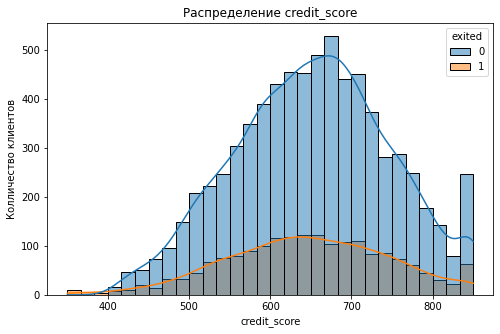

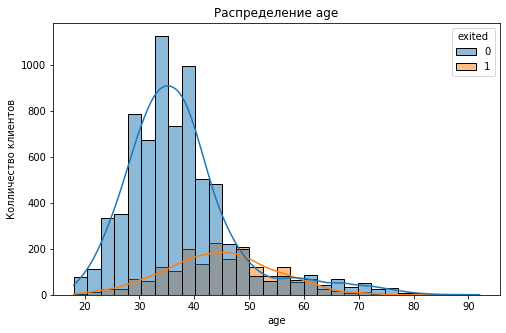

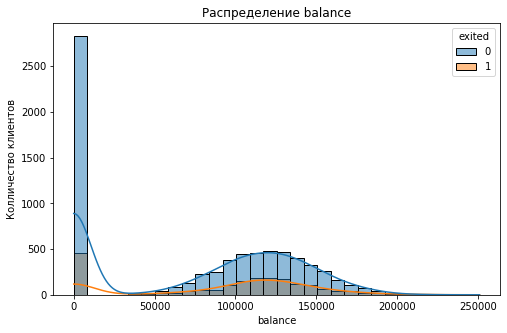

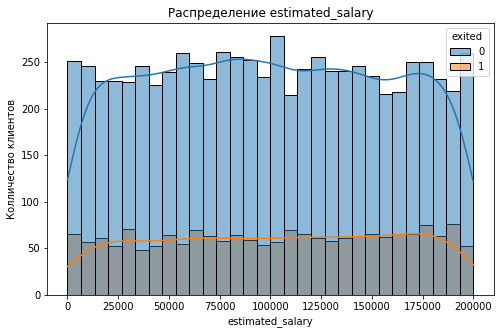

In [26]:
numerics = ['credit_score', 'age', 'balance', 'estimated_salary']
for column in numerics:
    hists(df, column, bins=30)

In [27]:
def hists_kg(df, column, bins, align='center'):
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(data=df, x=column, hue='exited', bins=bins, ax=ax)
    plt.title('Распределение ' + column)
    plt.xlabel(column)
    plt.ylabel('Колличество клиентов')
    plt.show()

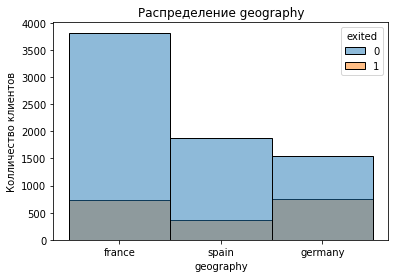

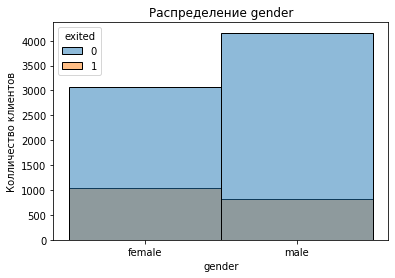

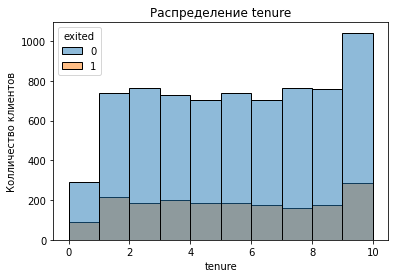

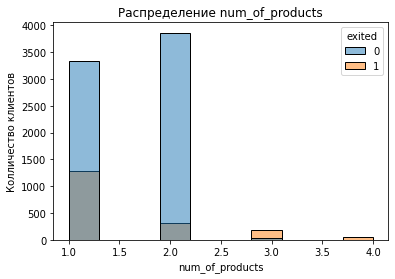

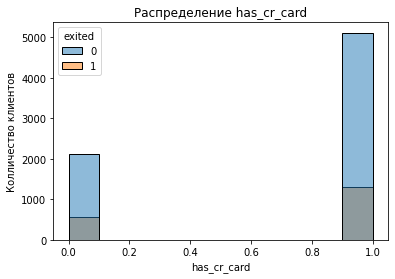

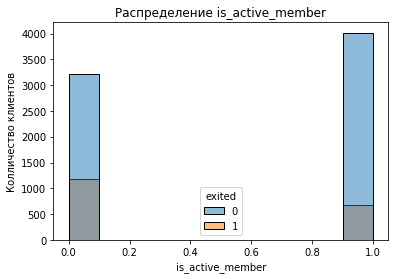

In [28]:
numerics = ['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member']
for column in numerics:
    hists_kg(df, column, bins=10)

Рассмотрев распределение признаков по целевому признаку, можно  заметить, что больше отток клиентов происходит в Германии. В большей степени уходят клиенты в возрасте от 38 до 50 лет, имеющие небольшой баланс на счете, имеющие только 1 продукт банка и с низкой активностью. Также, можно заметить, что женщины уходят чаще из банка, чем мужчины. 

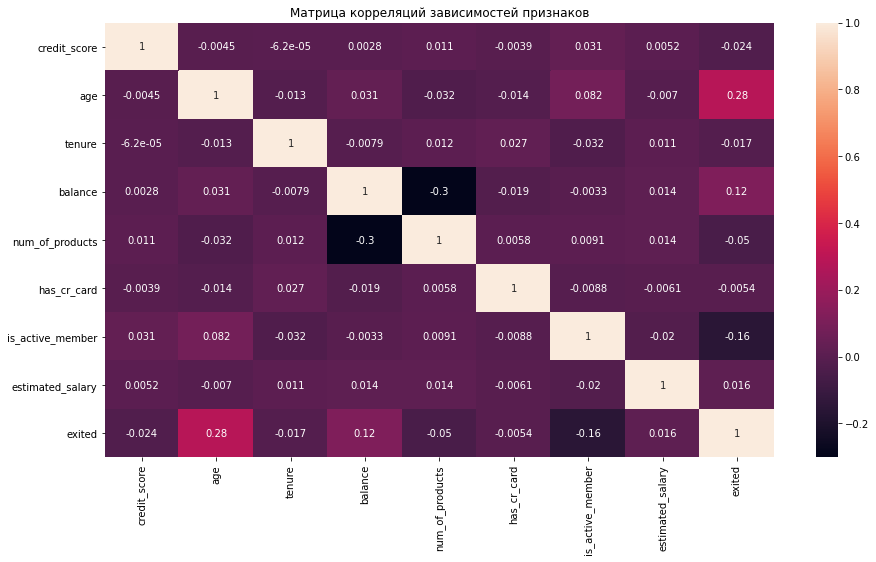

In [29]:
plt.figure(figsize=(15, 8))
plt.title('Матрица корреляций зависимостей признаков')
sns.heatmap(df.corr(), annot = True)
plt.show()

Глядя на матрицу корреляций, можно заметить, что на целевой признак `exited` с небольшой положительной корреляцией влияют признаки возраста клиента и баланса. Также можно заметить отрицательную корреляцию между количеством продуктов банка у клиента и балансом на счете. Видимо, чем больше продуктов, тем меньше сумма на счете.

Теперь разделю таблицу на признаки и целевой признак, а так же разобью данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [30]:
features = df.drop('exited', axis=1)
target = df['exited']

In [31]:
display(features.shape)
display(target.shape)

(9091, 10)

(9091,)

In [32]:
#разбиваю данные на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(
                                                            features, target, test_size=0.4,
                                                            random_state=12345, stratify=target)
#разбиваю валидационную выборку на валидационную и тестовую выборки
features_test, features_valid, target_test, target_valid = train_test_split(
                                                            features_valid, target_valid, 
                                                            test_size=0.5, random_state=12345,
                                                            stratify=target_valid)

In [33]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(5454, 10)

(5454,)

(1819, 10)

(1819,)

(1818, 10)

(1818,)

Чтобы преобразовать категориальные признаки в численные, воспользуюсь техникой прямого кодирования OHE. 

In [34]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

Далее преобразую масштаб количественных признаков методом стандартизации

In [35]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

***Вывод:***

 - Предобработаны данные: исключены пропуски, регистр приведен к стандартному формату.
 - Составлен портрет клиента, который уходит из банка: клиенты женского пола, из Германии, в возрасте от 38 до 50 лет, имеют небольшой баланс на счете, низкую активность в банке и имеющие только 1 продукт банка.
 - Таблица разделена на признаки и целевой признак, данные разбиты на выборки: обучающую, валидационную и тестовую.
 - Преобразованы категориальные признаки методом прямого кодирования OHE.
 - Признаки стандартизированны.
 
В таблице классы несбалансированны, их соотношение 4:1.

## Исследование задачи

Создам функцию для расчета `AUC-ROC` и построния графика `ROC-кривой`.

In [37]:
def roc_auc(model, features_valid=features_valid, target_valid=target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('Площадь под кривой ROC: {:.5f}'.format(roc_auc_score(target_valid, probabilities_one_valid)))
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

А теперь бучу модели без учета дисбаланса классов. 

### Решающее дерево

Инициирую модель DecisionTreeClassifier из библиотеки sklearn. Качество модели будет проверено с помощью критериев `F1-мера` и `AUC-ROC`.

In [38]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0
for depth in range(1, 50):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_dtc.fit(features_train, target_train)
    predictions_valid_dtc = model_dtc.predict(features_valid)
    result_dtc = f1_score(target_valid, predictions_valid_dtc)
    if result_dtc > best_result_dtc:
        best_model_dtc = model_dtc
        best_result_dtc = result_dtc
        best_depth_dtc = depth
print('F1-мера наилучшей модели на валидационной выборке:', best_result_dtc, 'Глубина дерева:', best_depth_dtc)

F1-мера наилучшей модели на валидационной выборке: 0.557659208261618 Глубина дерева: 7


Площадь под кривой ROC: 0.81736


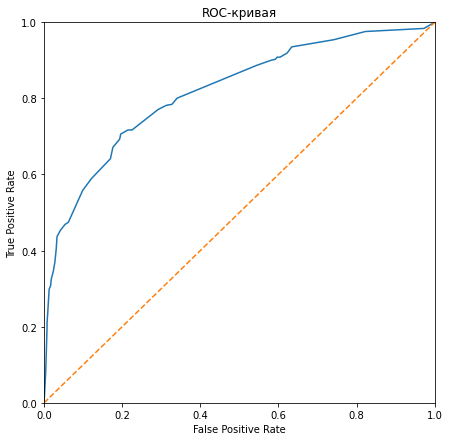

In [39]:
roc_auc(best_model_dtc)

Наилучшее значение F1=0,55766 достигнуто при глубине дерева 7. Ниже необходимой метрики 0,59. Значение AUC-ROC: 0.81736.

### Случайный лес

In [40]:
best_model_rfc = None
best_result_rfc = 0
best_depth = 0
best_est_rfc = 0
for est in range(20, 100, 5):
    for depth in range (1, 20, 1):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_train, target_train)
        predictions_valid_rfc = model_rfc.predict(features_valid)
        result_rfc = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc > best_result_rfc:
            best_model_rfc = model_rfc
            best_result_rfc = result_rfc
            best_depth_rfc = depth
            best_est_rfc = est
print('F1-мера наилучшей модели на валидационной выборке:', best_result_rfc, 'Количество деревьев:', best_est_rfc, 'Максимальная глубина:', depth)

F1-мера наилучшей модели на валидационной выборке: 0.5870646766169154 Количество деревьев: 35 Максимальная глубина: 19


Площадь под кривой ROC: 0.83402


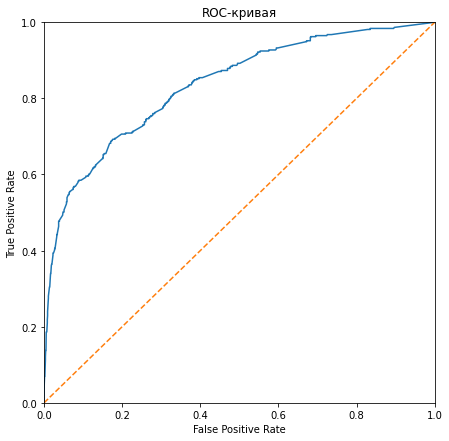

In [41]:
roc_auc(best_model_rfc)

Наилучшее значение F1=0,587 достигнуто при глубине дерева 19 и количестве деревьев 35. Почти соответствует метрики по заданию 0,59, но все же ниже. Значение AUC-ROC: 0.83402.

### Логистическая регрессия

In [42]:
model_lr = LogisticRegression(random_state=12345, max_iter=10000)
model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)
result_lr = f1_score(target_valid, predictions_valid_lr)

              
print('F1-мера модели на валидационной выборке:', result_lr)

F1-мера модели на валидационной выборке: 0.35203094777562866


Площадь под кривой ROC: 0.77451


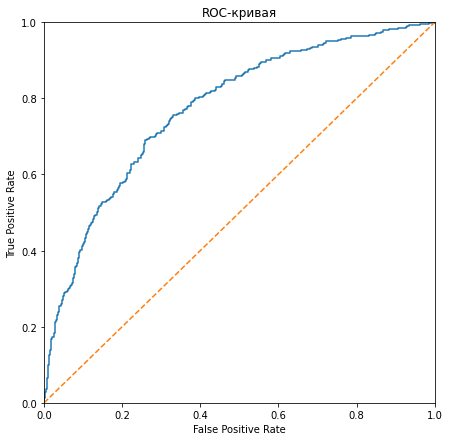

In [43]:
roc_auc(model_lr)

Качество модели логистической регрессии при рассмотрении метрики F1, ниже всех предыдущих моделей и составляет 0,35. И значение AUC-ROC хуже 0,77451.

***Вывод:***

Обучены модели без учета дисбаланса качества: решающее дерево, случайный лес, логистическая регрессия. Наилучшее значение метрики F1=0,587 достигнуто при обучении модели случайного леса.

## Борьба с дисбалансом

Учту дисбаланс классов, чтобы улучшить качество модели. Рассмотрю следующие техники:
- взвешивание классов
- увеличение выборки (upsampling)
- уменьшение выборки (downsampling)
- изменение порога классификации

### Взвешивание классов

#### Решающее дерево

In [44]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0
for depth in range(1, 50):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model_dtc.fit(features_train, target_train)
    predictions_valid_dtc = model_dtc.predict(features_valid)
    result_dtc = f1_score(target_valid, predictions_valid_dtc)
    if result_dtc > best_result_dtc:
        best_model_dtc = model_dtc
        best_result_dtc = result_dtc
        best_depth_dtc = depth
print('F1-мера наилучшей модели на валидационной выборке:', best_result_dtc, 'Глубина дерева:', best_depth_dtc)

F1-мера наилучшей модели на валидационной выборке: 0.5675675675675674 Глубина дерева: 8


Площадь под кривой ROC: 0.80520


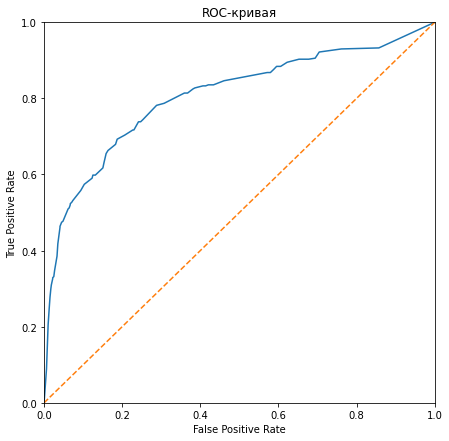

In [45]:
roc_auc(best_model_dtc)

Качество модели не много улучшилось до F1=0,567 с глубиной дерева 8, но все же ниже необходимого качества, а значение AUC-ROC снизилось - 0.80520.

#### Случайный лес

In [46]:
best_model_rfc_1 = None
best_result_rfc_1 = 0
best_depth_1 = 0
best_est_rfc_1 = 0
for est in range(20, 100, 5):
    for depth in range (1, 20, 1):
        model_rfc_1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rfc_1.fit(features_train, target_train)
        predictions_valid_rfc_1 = model_rfc.predict(features_valid)
        result_rfc_1 = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc_1 > best_result_rfc_1:
            best_model_rfc_1 = model_rfc_1
            best_result_rfc_1 = result_rfc_1
            best_depth_rfc_1 = depth
            best_est_rfc_1 = est
print('F1-мера наилучшей модели на валидационной выборке:', best_result_rfc, 'Количество деревьев:', best_est_rfc, 'Максимальная глубина:', depth)

F1-мера наилучшей модели на валидационной выборке: 0.5870646766169154 Количество деревьев: 35 Максимальная глубина: 19


Площадь под кривой ROC: 0.78987


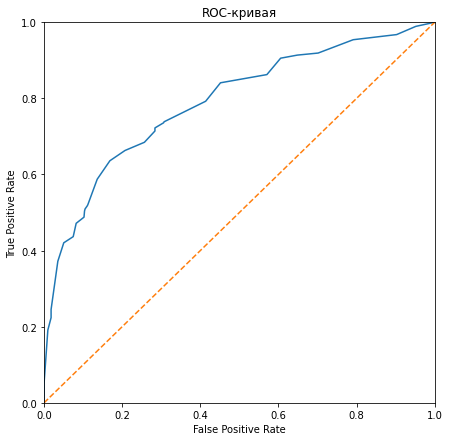

In [47]:
roc_auc(best_model_rfc_1)

При взвешивании классов моделью случайного леса достигнута F1-мера, которая соответствует техническому заданию. F1-мера наилучшей модели на валидационной выборке: 0.587 с количеством деревьев: 35 и максимальной глубиной: 19. Значение AUC-ROC: 0.78987. 

#### Логистическая регрессия

In [48]:
model_lr = LogisticRegression(random_state=12345, max_iter=10000, class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)
result_lr = f1_score(target_valid, predictions_valid_lr)

              
print('F1-мера модели на валидационной выборке:', result_lr)

F1-мера модели на валидационной выборке: 0.5082125603864733


Площадь под кривой ROC: 0.77810


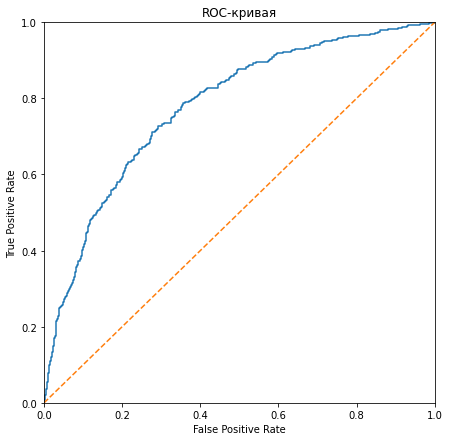

In [49]:
roc_auc(model_lr)

Значение F1-меры значительно увеличилось и составило 0,508, но это значение значительно ниже необходимого 0,59. А значение AUC-ROC практически не изменилось - 0.77810.

### Увеличение выборки

Сделаю объекты редкого класса не такими редкими. Напишу функцию для увеличения выборки.

In [50]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [51]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Решающее дерево

In [52]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0
for depth in range(1, 50):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_dtc.fit(features_upsampled, target_upsampled)
    predictions_valid_dtc = model_dtc.predict(features_valid)
    result_dtc = f1_score(target_valid, predictions_valid_dtc)
    if result_dtc > best_result_dtc:
        best_model_dtc = model_dtc
        best_result_dtc = result_dtc
        best_depth_dtc = depth
print('F1-мера наилучшей модели на валидационной выборке:', best_result_dtc, 'Глубина дерева:', best_depth_dtc)

F1-мера наилучшей модели на валидационной выборке: 0.5711060948081264 Глубина дерева: 8


Площадь под кривой ROC: 0.80833


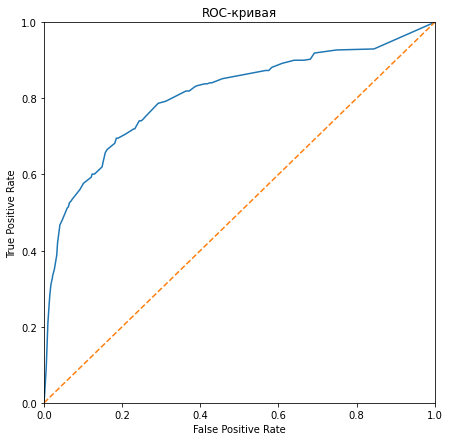

In [53]:
roc_auc(best_model_dtc)

Значение F1-меры стало ниже, чем при взвешивании классов. И составляет 0,5711 при глубине дерева 8. Площадь под кривой ROC: 0.80833.

#### Случайный лес

In [54]:
best_model_rfc = None
best_result_rfc = 0
best_depth = 0
best_est_rfc = 0
for est in range(20, 100, 5):
    for depth in range (1, 20, 1):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_upsampled, target_upsampled)
        predictions_valid_rfc = model_rfc.predict(features_valid)
        result_rfc = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc > best_result_rfc:
            best_model_rfc = model_rfc
            best_result_rfc = result_rfc
            best_depth_rfc = depth
            best_est_rfc = est
print('F1-мера наилучшей модели на валидационной выборке:', best_result_rfc, 'Количество деревьев:', best_est_rfc, 'Максимальная глубина:', depth)

F1-мера наилучшей модели на валидационной выборке: 0.6115007012622721 Количество деревьев: 30 Максимальная глубина: 19


Площадь под кривой ROC: 0.83746


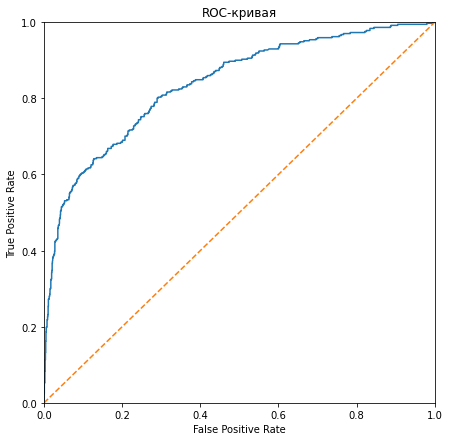

In [55]:
roc_auc(best_model_rfc)

Значение F1-меры у модели случайного леса не много снизилось, по сравнению со взвешиванием классов. И составило 0,6115 при количестве деревьев 30 и максимальной глубине 19. Значение AUC-ROC: 0.83746 стало не много ниже.

#### Логистическая регрессия

In [56]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1-мера модели на валидационной выборке:', f1_score(target_valid, predicted_valid))

F1-мера модели на валидационной выборке: 0.5042816365366317


Площадь под кривой ROC: 0.77818


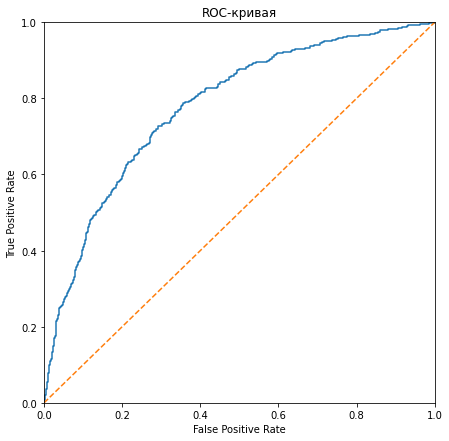

In [57]:
roc_auc(model)

При увеличении выборки, значение F1-меры ниже, чем при взвешивании классов. И составляет 0,504. Значение AUC-ROC: 0.77818.

### Уменьшение выборки

Сделаю объекты частого класса не такими частыми. Напишу функцию для уменьшения выборки.

In [58]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [59]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#### Решающее дерево

In [60]:
best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0
for depth in range(1, 50):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_dtc.fit(features_downsampled, target_downsampled)
    predictions_valid_dtc = model_dtc.predict(features_valid)
    result_dtc = f1_score(target_valid, predictions_valid_dtc)
    if result_dtc > best_result_dtc:
        best_model_dtc = model_dtc
        best_result_dtc = result_dtc
        best_depth_dtc = depth
print('F1-мера наилучшей модели на валидационной выборке:', best_result_dtc, 'Глубина дерева:', best_depth_dtc)

F1-мера наилучшей модели на валидационной выборке: 0.55779427359491 Глубина дерева: 4


Площадь под кривой ROC: 0.81104


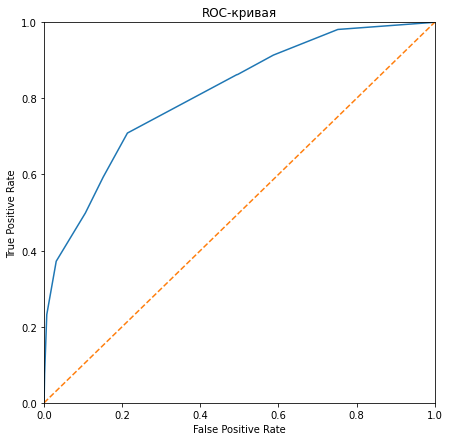

In [61]:
roc_auc(best_model_dtc)

При fraction=0,25, F1-мера наилучшей модели на валидационной выборке составляет 0.55779427359491 при глубине дерева: 4. Площадь под кривой ROC: 0.81104

#### Случайный лес

In [62]:
best_model_rfc = None
best_result_rfc = 0
best_depth = 0
best_est_rfc = 0
for est in range(20, 100, 5):
    for depth in range (1, 20, 1):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_downsampled, target_downsampled)
        predictions_valid_rfc = model_rfc.predict(features_valid)
        result_rfc = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc > best_result_rfc:
            best_model_rfc = model_rfc
            best_result_rfc = result_rfc
            best_depth_rfc = depth
            best_est_rfc = est
print('F1-мера наилучшей модели на валидационной выборке:', best_result_rfc, 'Количество деревьев:', best_est_rfc, 'Максимальная глубина:', depth)

F1-мера наилучшей модели на валидационной выборке: 0.5859030837004405 Количество деревьев: 20 Максимальная глубина: 19


Площадь под кривой ROC: 0.85130


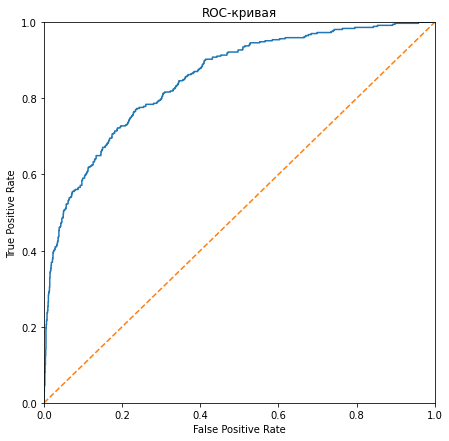

In [63]:
roc_auc(best_model_rfc)

При fraction=0,25, F1-мера наилучшей модели на валидационной выборке составляет 0.5859030837004405 при количестве деревьев: 20 и максимальной глубине: 19. Площадь под кривой ROC: 0.85130

#### Логистическая регрессия

In [64]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1-мера модели на валидационной выборке:', f1_score(target_valid, predicted_valid))

F1-мера модели на валидационной выборке: 0.509433962264151


Площадь под кривой ROC: 0.77950


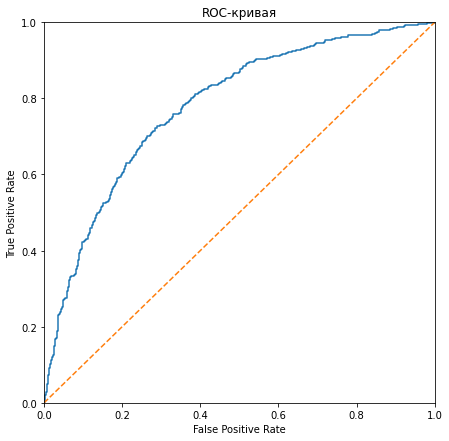

In [65]:
roc_auc(model)

При уменьшении выбоки значение F1-меры составляет 0,509 и является самым максимальным при обучении модели логистической регрессии. Но все же ниже значения, которое необходимо в задании. Площадь под кривой ROC: 0.77950

### Изменение порога классификации

Изменю значение порога и посмотрю, какими станут метрики.

#### Решающее дерево

In [66]:
best_model_dtc = None
best_result_dtc = 0.512
predicted_best = []
threshold_dtc = 0
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=19) 
model_dtc.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
    
for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    result_dtc = f1_score(target_valid, predicted_valid)
    if result_dtc > best_result_dtc:        
        best_model_dtc = model_dtc
        best_result_dtc = result_dtc
        threshold_dtc = threshold
        predicted_best = predicted_valid
print('F1-мера наилучшей модели на валидационной выборке:', best_result_dtc, 'Лучший порог:', threshold_dtc) 

F1-мера наилучшей модели на валидационной выборке: 0.5128205128205128 Лучший порог: 0.52


Площадь под кривой ROC: 0.69802


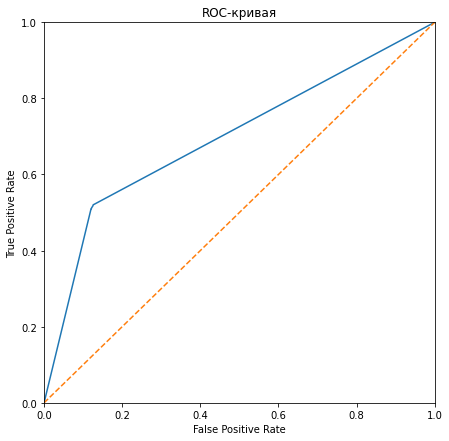

In [67]:
roc_auc(best_model_dtc)

Максимальное значение критерия F1-мера при наилучшем пороге - 0,52 составляет 0,5128, а значение AUC-ROC: 0.69802. Данные показатели далеки от идеальных.

#### Случайный лес

In [68]:
best_model_rfc = None
best_result_rfc = 0
threshold_rfc = 0
predicted_best = []
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=35, max_depth=19)
model_rfc.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    result_rfc = f1_score(target_valid, predicted_valid)
    if result_rfc > best_result_rfc:        
        best_model_rfc = model_rfc
        best_result_rfc = result_rfc
        threshold_rfc = threshold
        predicted_best = predicted_valid
print('F1-мера наилучшей модели на валидационной выборке:', best_result_rfc, 'Лучший порог:', threshold_rfc) 


F1-мера наилучшей модели на валидационной выборке: 0.5128205128205128 Лучший порог: 0.52


Площадь под кривой ROC: 0.83427


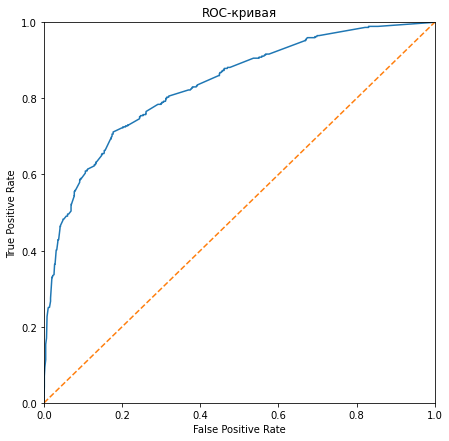

In [69]:
roc_auc(best_model_rfc)

Максимальное значение критерия F1-мера при наилучшем пороге составляет 0,5128, а вот значение AUC-ROC: 0.83427.

#### Логистическая регрессия

In [70]:
best_model = None
best_result = 0
best_threshold = 0
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:        
        best_model = model
        best_result = result
        best_threshold = threshold
print('F1-мера наилучшей модели на валидационной выборке:', best_result, 'Лучший порог:', best_threshold) 

F1-мера наилучшей модели на валидационной выборке: 0.5 Лучший порог: 0.3


Площадь под кривой ROC: 0.77436


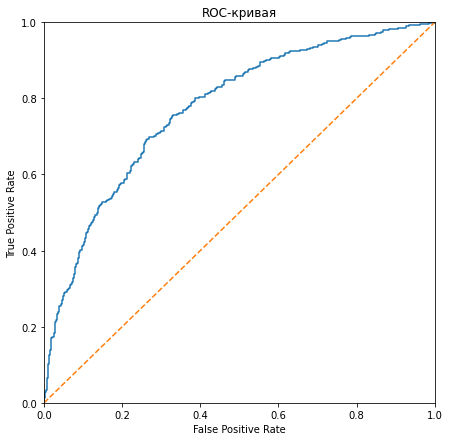

In [71]:
roc_auc(best_model)

Максимальное значение критерия F1-мера при наилучшем пороге - 0,3 составляет 0,5, а значение AUC-ROC: 0.77436. Данные значения очень низкие и не соответствуют поставленной задачи.

**Вывод:**

В данном разделе были исследованы балансы классов, обучены модели без учёта дисбаланса. Было улучшено качество моделей, учитывая дисбаланс классов. Обучены разные модели и найдена лучшая.
Необходимое качество, которое соответствует поставленной задачи (метрика доведена до 0,59) смогла достигнуть модель случайного леса при увеличении выборки с количеством деревьев: 30 и максимальной глубиной: 19, показатели F1-мера:0,6115, значение AUC-ROC: 0.83746.
Лучшей моделью является модель случайного леса со значением **F1-меры = 0,6115.**

## Тестирование модели

По результатам проверки на валидационной выборке, лучшей моделью является модель случайного леса со значением F1-меры = 0,6115, количеством деревьев 30 и максимальной глубиной 19.

Проверю данную модель на тестовой выборке, чтобы убедиться в качестве модели.

In [72]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=19)
best_model.fit(features_upsampled, target_upsampled)
predictions_test = best_model.predict(features_test)
result = f1_score(target_test, predictions_test)
print('F1-мера наилучшей модели на тестовой выборке:', result)

F1-мера наилучшей модели на тестовой выборке: 0.6044444444444445


Площадь под кривой ROC: 0.85547


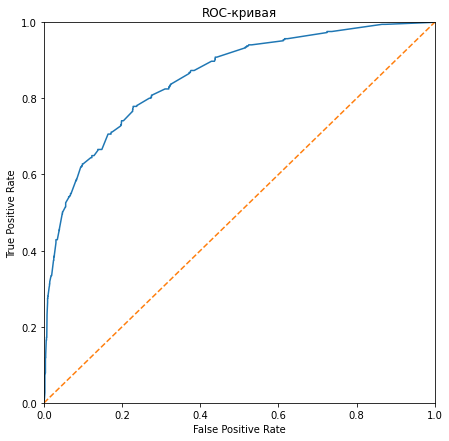

In [74]:
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('Площадь под кривой ROC: {:.5f}'.format(roc_auc_score(target_test, probabilities_one_test)))
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

При проверки лучшей модели на тестовой выборке значение F1-меры равно 0.604, а значение AUC-ROC: 0.85547. Данные показатели полностью соответствуют поставленной задачи.

## Общий вывод

Подготовлены данные к обучению:
 - исключены пропуски, регистр приведен к стандартному формату;
 - составлен портрет клиента, который уходит из банка: клиенты женского пола, из Германии, в возрасте от 38 до 50 лет, имеют небольшой баланс на счете, низкую активность в банке и имеющие только 1 продукт банка;
 - данные разделены на признаки и целевой признак;
 - данные разбиты на выборки: обучающую, валидационную и тестовую в соотношении 3:1:1;
 - преобразованы категориальные признаки методом прямого кодирования One-Hot Encoder;
 - количественные признаки стандартизированы.
 
Проведен анализ моделей без учета дисбаланса классов:
 - обучены модели решающего дерева, случайного дерева и логистической регрессии;
 - рассмотрены метрики F1-меры и AUC-ROC, максимальное значение, которых соответствует модели случайного дерева F1-мера = 0,587, AUC-ROC = 0,83402.
 
Проведен анализ дисбаланса классов:. Обучите разные модели и найдите лучшую. Кратко опишите выводы
 - применены техники для увеличения качества при дисбалансе классов - взвешивание классов, upsampling, downsampling и изменение порога классификации;
 - обучены модели и получены показатели соответствующие поставленной задачи, лучшей моделью является модель случайного леса с F1-мера = 0,6115 и AUC-ROC = 0,83746.
 
Проведено тестирование лучшей модели:
 - итоговые показатели качества модели соответствуют поставленной задачи: F1-мера = 0,604 и AUC-ROC = 0,83746.